# K-Means Clustering

# Loading data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
data = loadmat('ex7data2.mat')

In [9]:
X = data['X']
X.shape

(300, 2)

# Finding closest centroids

In [52]:
def findClosestCentroids(X, centroids):
    
    idx = np.zeros((X.shape[0], 1))
    K = centroids.shape[0]
    c = np.zeros((centroids.shape[0], 1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            distance = X[i,:] - centroids[j,:]
            length = np.sum(np.square(distance))
            c[j] = length
            
        idx[i] = np.argmin(c) + 1
        idx
    return idx.ravel()      

In [53]:
# test
k = 3
centroid = np.array([[3,3],[6,2],[8,5]])
index = findClosestCentroids(X, centroid)
print('The centroids closest to the first 3 examples are \n', index[0:3])

The centroids closest to the first 3 examples are 
 [1. 3. 2.]


# Computing centroid means

In [54]:
def computeCentroids(X, idx, K):
    
    m, n = X.shape
    mean = np.zeros((K, 1))
    centroids = np.zeros((K, n))
    
    for i in range(m):
        index = int(idx[i] - 1)
        centroids[index, :] += X[i,:]
        mean[index] += 1
    
    return centroids/mean

In [55]:
centroids = computeCentroids(X, index, k)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


# Visualizing K-means

In [59]:
def plotKmeans(X, centroids, idx, K, num_iters):
    """
    plots the data points with colors assigned to each centroid
    """
    m, n = X.shape
    
    fig, ax = plt.subplots(nrows=num_iters, ncols=1, figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        # visualize the new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()

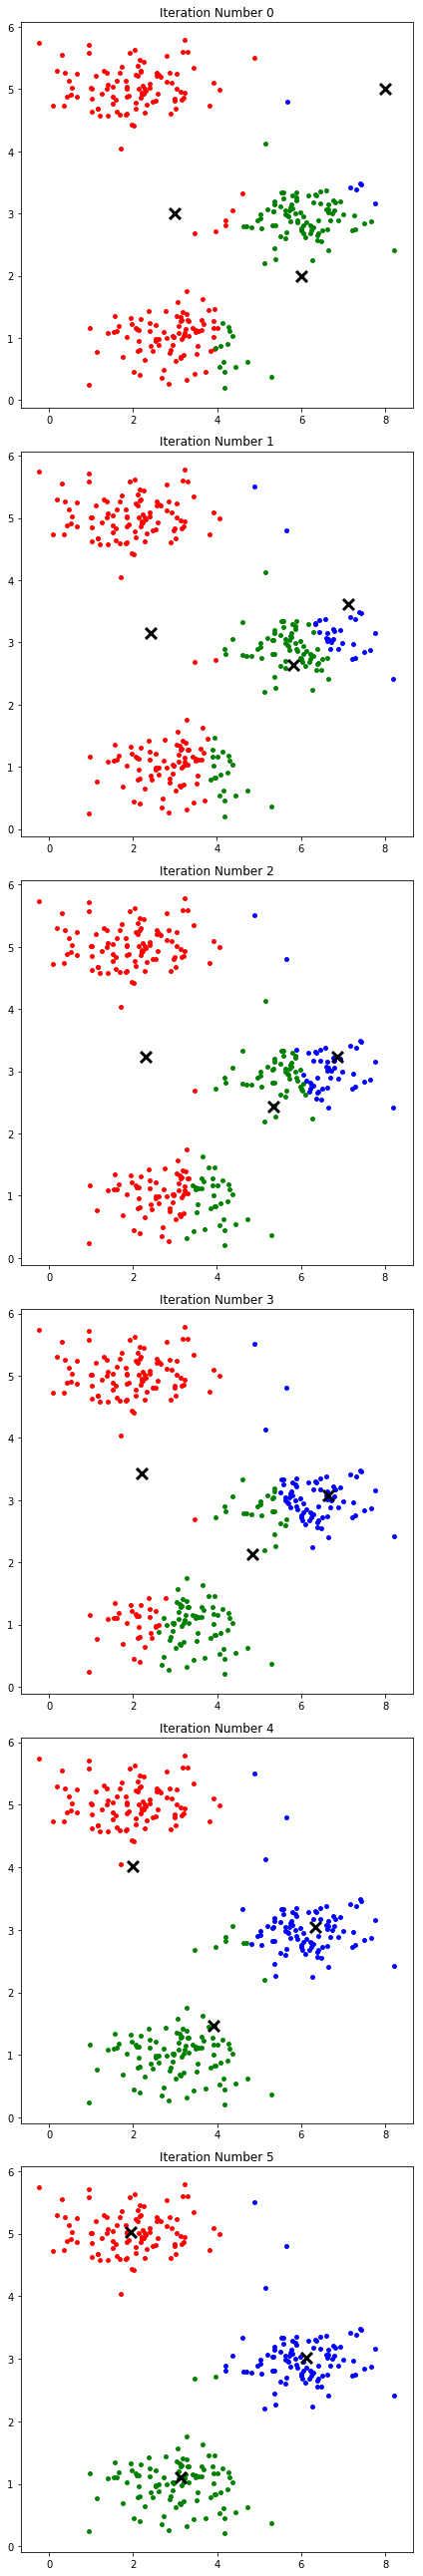

In [63]:
m, n = X.shape[0],X.shape[1]
plotKmeans(X, centroid, index, k, 6)

# Random Initialization

In [65]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to beused in K-Means on the dataset X
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0, m + 1), :]
        
    return centroids

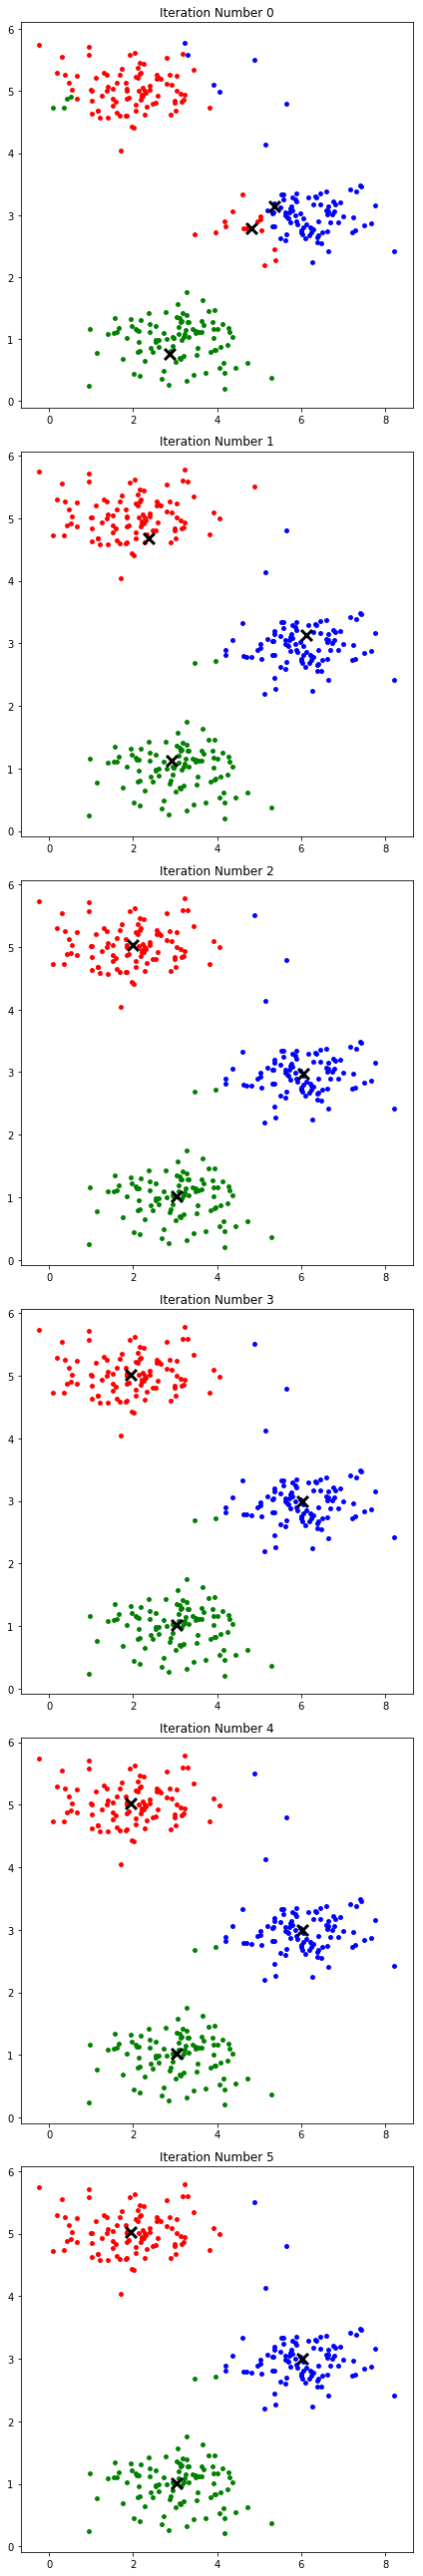

In [66]:
centroids = kMeansInitCentroids(X, k)
index = findClosestCentroids(X, centroids)
plotKmeans(X, centroids, index, k, 6)

# Image compression with K-means

In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

# K-means on pixels

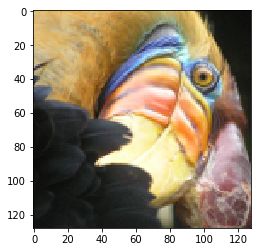

In [93]:
img = plt.imread('bird_small.png')
plt.imshow(img)

In [94]:
img.shape

(128, 128, 3)

In [95]:
#prepocess image
img = (img/255).reshape(128*128, 3)

In [75]:
def runKmeans(X, initial_centroids, num_iters, K):
    
    idx = findClosestCentroids(X, initial_centroids)
    
    for i in range(num_iters):
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)

        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, initial_centroids)

        
    return centroids, idx

In [77]:
k2 = 16
initial_centroids2 = kMeansInitCentroids(img, k2)
centroids2, index2 = runKmeans(img, initial_centroids2, 10, k2)

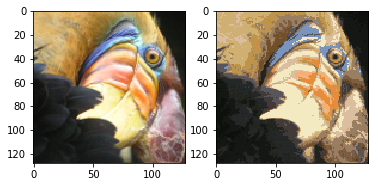

In [99]:
m2, n2 = img.shape
img_recovered = img.copy()
for i in range(1, k2 + 1):
    img_recovered[(index2 == i).ravel(), :] = centroids2[i-1]

# Reshape the recovered image into proper dimensions
img_recovered = img_recovered.reshape(128,128,3)

# Display the image
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow((img * 255).reshape(128,128,3))
ax[1].imshow(img_recovered * 255)

# Principle Component Analysis

In [101]:
data3 = loadmat("ex7data1.mat")
X3 = data3["X"]

# Visualizing the data

In [103]:
X3.shape

(50, 2)

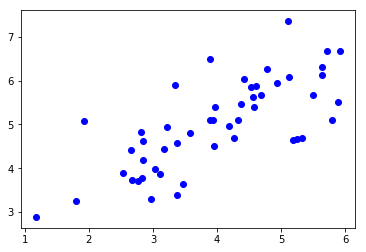

In [106]:
plt.scatter(X3[:, 0], X3[:, 1], marker='o', color='b')

# Implementing PCA

In [107]:
def featureNormalize(X):
    mean = np.mean(X, axis=0)
    X = X - mean
    std = np.std(X, axis=0)
    X = X / std
    return X, mean, std

In [108]:
def pca(X):
    """
    Computes eigenvectors of the covariance matrix of X
    """
    m, n = X.shape
    
    sigma = 1/m * np.dot(X.T, X)
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [109]:
from numpy.linalg import svd
X_norm, mean, std = featureNormalize(X3)
U, S, V = pca(X_norm) # U contains the principal components, S contains a diagonal matrix

# Visualizing PCA

(2, 8)

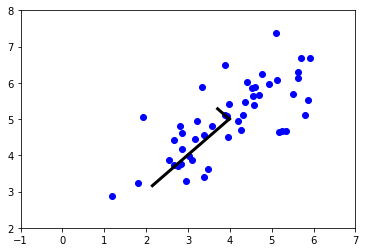

In [129]:
# Draw the eigenvectors centered at mean of data. These lines show the 
# directions of maximum variations in the dataset
plt.scatter(X3[:, 0], X3[:, 1], marker='o', color='b')
plt.plot([mean[0], (mean + 1.5 * S[0] * U[:,0].T)[0]], [mean[1], (mean + 1.5 * S[0] * 
                                                                 U[:,0].T)[1]],
         color="black", linewidth=3)
plt.plot([mean[0], (mean + 1.5 * S[1] * U[:,1].T)[0]], [mean[1], (mean + 1.5 * S[1] * 
                                                                  U[:,1].T)[1]],
         color="black", linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [116]:
print("Top eigenvector U(:,1) =:",U[:,0])

Top eigenvector U(:,1) =: [-0.70710678 -0.70710678]


# Dimensionality reduction with PCA 

In [117]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m, K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = np.dot(X[i,:], U_reduced[:,j])
    
    return Z

In [118]:
# Project the data onto K=1 dimension
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578526


# Reconstructing an approximation of the data

In [137]:
def recoverData(Z, U, K):
    
    m, n = Z.shape[0], U.shape[0]
    X_rec = np.zeros((m, n))
    U_reduced = U[:, :K]
    
    for i in range(m):
        X_rec[i] = np.dot(Z[i], U_reduced.T)
    
    return X_rec

In [138]:
X_rec = recoverData(Z, U, K)
print('Approximation of the first example is: ', X_rec[0,:])

Approximation of the first example is:  [-1.05805279 -1.05805279]


# Visualizing the projections

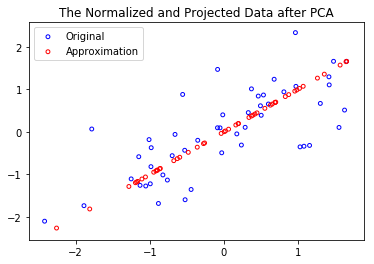

In [139]:
plt.scatter(X_norm[:,0], X_norm[:,1], marker="o", 
            label="Original", facecolors="none", edgecolors="b" ,s=15)
plt.scatter(X_rec[:,0], X_rec[:,1], marker="o", 
            label="Approximation", facecolors="none", edgecolors="r", s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

# Total Variation in Data

In [149]:
var = 1 - (np.sum(S[:K]) / np.sum(S))
print((1 - var) * 100, '% of variance is retained' )

86.77651881696647 % of variance is retained


In [150]:
#Alternate method
1- ((1/m) * np.sum(np.square(X_norm - X_rec))) / ((1/m) * np.sum(np.square(X_norm)))

0.8677651881696647

# Face Image Dataset

In [152]:
data4 = loadmat('ex7faces.mat')
X = data4['X']

In [162]:
X.shape

(5000, 1024)

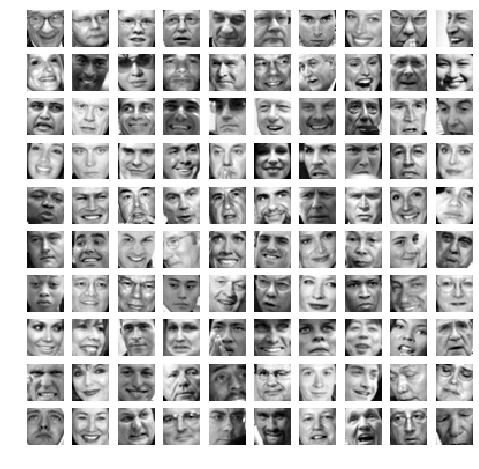

In [157]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

# PCA on Faces

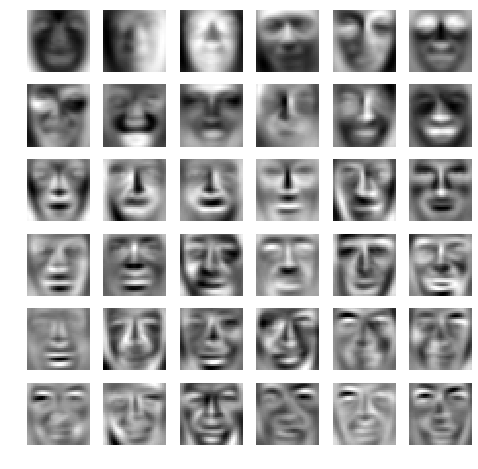

In [164]:
X_norm = featureNormalize(X)[0]
U, S, V = pca(X_norm)

#Visualize the top 36 eigenvectors found
k = 36
U_reduced = U[:,:k].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

# Variance retained

In [165]:
var = 1 - (np.sum(S[:k]) / np.sum(S))
print((1 - var) * 100, '% of variance is retained' )

83.1184614910983 % of variance is retained


In [171]:
K2 = 100
Z2 = projectData(X_norm, U, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


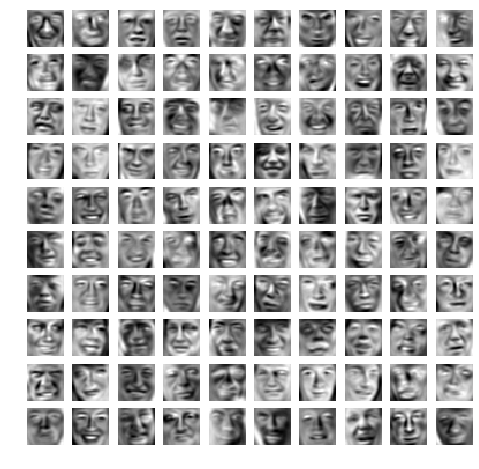

In [172]:
# Data reconstruction
X_rec2  = recoverData(Z2, U, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")

In [173]:
var = 1 - (np.sum(S[: K2]) / np.sum(S))
print((1 - var) * 100, '% of variance is retained' )

93.19320428645925 % of variance is retained
